In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip -q '/content/drive/MyDrive/ IVP_project/archive.zip'

In [ ]:
class_1 = os.listdir('/content/yes/')
class_0 = os.listdir('/content/no/')

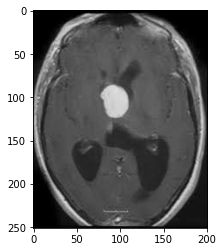

Image size= (251, 201, 3)


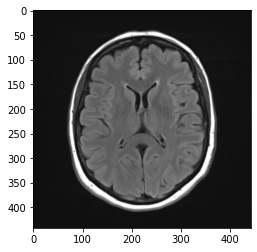

Image size= (442, 442, 3)


In [ ]:
example1 = plt.imread('/content/yes/' + class_1[123])
plt.imshow(example1)
plt.show()
print('Image size=', example1.shape)

example0 = plt.imread('/content/no/' + class_0[54])
plt.imshow(example0)
plt.show()
print('Image size=', example0.shape)

In [ ]:
os.mkdir('/content/train/')
os.mkdir('/content/test/')
os.mkdir('/content/train/yes/')
os.mkdir('/content/train/no/')
os.mkdir('/content/test/yes/')
os.mkdir('/content/test/no/')

In [ ]:
import shutil

np.random.seed(0)
random.seed(0)
train_1, test_1 = train_test_split(class_1, test_size=0.3,  shuffle = True)
train_0, test_0 = train_test_split(class_0, test_size=0.3, shuffle = True)


for filename in train_1:
    shutil.copy('/content/yes/'+filename, '/content/train/yes/'+filename)

for filename in train_0:
    shutil.copy('/content/no/'+filename, '/content/train/no/'+filename)

for filename in test_1:
    shutil.copy('/content/yes/'+filename, '/content/test/yes/'+filename)

for filename in test_0:
    shutil.copy('/content/no/'+filename, '/content/test/no/'+filename)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train/',
    target_size=(227, 227),
    shuffle = True,
    batch_size=32)

validation_generator = test_datagen.flow_from_directory(
    '/content/test/',
    target_size=(227, 227),
    batch_size=32)

Found 176 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.0001, momentum=0.9, decay=1e-6), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
6/6 [==============================] - 35s 600ms/step - loss: 1.7484 - accuracy: 0.5000 - val_loss: 0.6888 - val_accuracy: 0.6104
Epoch 2/100
6/6 [==============================] - 3s 476ms/step - loss: 1.4515 - accuracy: 0.5625 - val_loss: 0.6833 - val_accuracy: 0.6104
Epoch 3/100
6/6 [==============================] - 3s 528ms/step - loss: 1.2757 - accuracy: 0.5966 - val_loss: 0.6792 - val_accuracy: 0.6104
Epoch 4/100
6/6 [==============================] - 3s 528ms/step - loss: 1.1297 - accuracy: 0.6534 - val_loss: 0.6778 - val_accuracy: 0.6104
Epoch 5/100
6/6 [==============================] - 3s 492ms/step - loss: 1.1558 - accuracy: 0.6705 - val_loss: 0.6735 - val_accuracy: 0.6104
Epoch 6/100
6/6 [==============================] - 3s 481ms/step - loss: 1.0971 - accuracy: 0.7159 - val_loss: 0.6723 - val_accuracy: 0.6104
Epoch 7/100
6/6 [==============================] - 3s 479ms/step - loss: 1.1308 - accuracy: 0.6989 - val_loss: 0.6683 - val_accuracy: 0.6104
Epoch 8/100


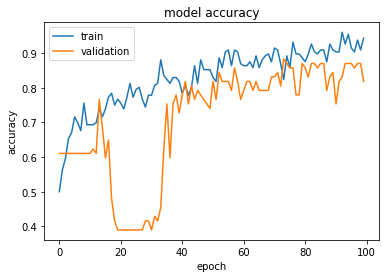

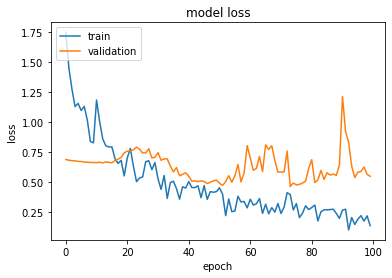

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 0s 102ms/step - loss: 0.5492 - accuracy: 0.8182


[0.5491921305656433, 0.8181818127632141]

In [ ]:
model.evaluate(train_generator)

6/6 [==============================] - 2s 400ms/step - loss: 0.0986 - accuracy: 0.9716


[0.09863800555467606, 0.9715909361839294]